In [163]:
### Lundrim Alla , 12244059 ##

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import scipy.io.wavfile as wavfile
import scipy.signal.windows as windows



# Task 1a) Basic Vector

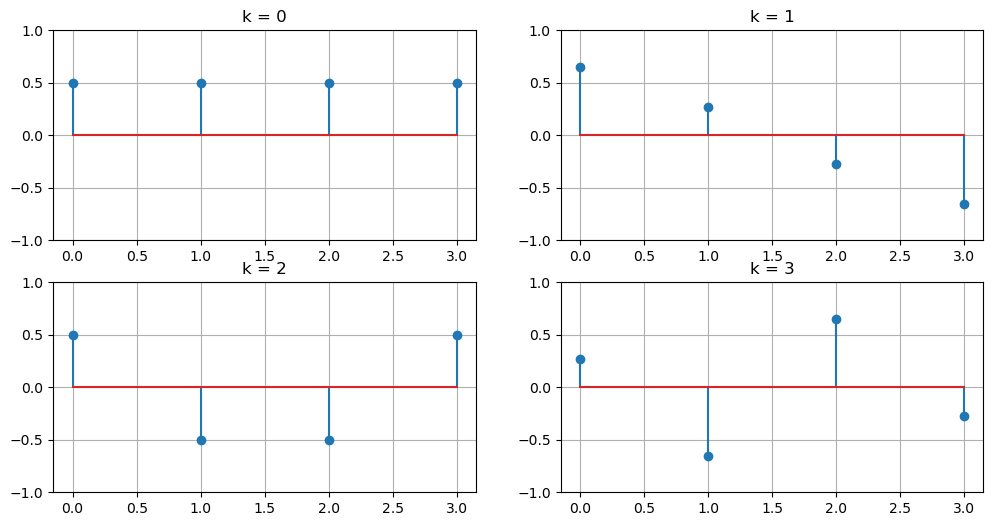

In [165]:
# Function to generate the basis vector for a given value of k
def basis_vector(N, k):
    n = np.arange(N)  
    c_k = np.sqrt(1/N) if k == 0 else np.sqrt(2/N)  

    # Compute the values of the basis vector using the DCT formula
    a_k = c_k * np.cos(np.pi/(2*N) * k * (2*n + 1))

    return a_k

N = 4
fig, axs = plt.subplots(2, 2, figsize=(12, 6))  # Create a 2x2 grid of subplots

# Iterate over each subplot and plot the corresponding basis vector
for i, ax in enumerate(axs.flat):
    ax.set_title("k = " + str(i))  
    ax.stem(basis_vector(N, i))  
    ax.set_ylim([-1, 1])  
    ax.grid()  

plt.show() 


# Task 1b) Basic Image

symmetric


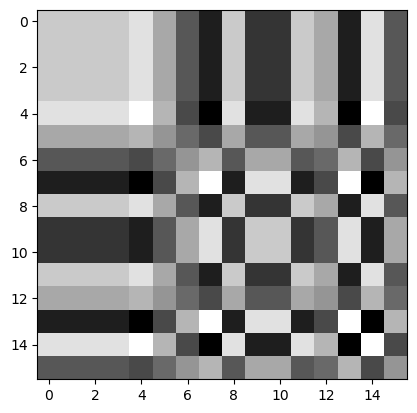

In [166]:
# Function to generate the basis vector for a given value of k
def basis_vector(N, k):
    n = np.arange(N)  
    c_k = np.sqrt(1/N) if k == 0 else np.sqrt(2/N)  

    # Compute the values of the basis vector using the DCT formula
    a_k = c_k * np.cos(np.pi/(2*N) * k * (2*n + 1))

    return a_k

# Function to generate the basis image of size N x N
def basis_image(N):
    image_shape = N**2  
    A_BI = np.empty((image_shape, image_shape))  

    # Iterate over each row and column of the basis image
    for i in range(N):
        a_k = basis_vector(N, i) 
        for j in range(N):
            a_transpose = np.transpose(basis_vector(N, j))  
            a_outer_product = np.outer(a_k, a_transpose) 
            for k in range(N):
                for l in range(N):
                    A_BI[(i*N)+k][(j*N)+l] = a_outer_product[k][l] 

    return A_BI

N = 4
A_BI = basis_image(N) 
A_BI_transpose = np.transpose(A_BI)  

if np.array_equal(A_BI, A_BI_transpose):
    print("symmetric")  

plt.imshow(A_BI, cmap='gray') 
plt.show()


# Task 1c) DCT Matrix

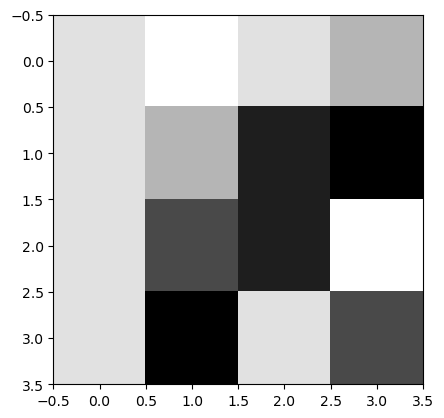

In [167]:
# Function to generate the basis vector for a given value of k
def basis_vector(N, k):
    n = np.arange(N)  # Create an array of indices from 0 to N-1
    c_k = np.sqrt(1/N) if k == 0 else np.sqrt(2/N)  # Compute the scaling factor based on the value of k

    # Compute the values of the basis vector using the DCT formula
    a_k = c_k * np.cos(np.pi/(2*N) * k * (2*n + 1))

    return a_k

# Function to generate the DCT matrix for a given size N
def dct_mat(N):
    dct_matrix = np.empty((N, N))

    for i in range(N):
        basis_vectors_helper = basis_vector(N, i)  # Generate the basis vector for the current index i
        dct_matrix[:, i] = basis_vectors_helper  # Assign the basis vector to the corresponding column of the DCT matrix

    return dct_matrix

N = 4
A_DCT = dct_mat(N)  # Generate the DCT matrix of size N
plt.imshow(A_DCT, cmap="gray")  # Display the DCT matrix as an image with a grayscale colormap
plt.show()  


# Task 1d) Block Transformation

In [168]:
def block_dct2(X, N):
    subimages = create_subimages(X, N)# Split the image into subimages
    subimages_with_dct = block_DCT(subimages, N)# Apply DCT to each subimage
    dct_image = block_syntesizer(subimages_with_dct, N)# Reassemble the subimages
    
    return dct_image

def create_subimages(image, N):
    chunk_size = int(image.shape[0] / N)# Determine the size of each subimage
    # Split the image into chunks
    image_chunk = np.array_split(image, chunk_size, 1)
    image_chunk = np.array(image_chunk)
    # Create chunks of chunk_image parts
    chunks = create_chunk_image_parts(image_chunk, chunk_size)
    
    return chunks

def create_chunk_image_parts(image_chunk, chunk_size):
    # Split each chunk of the image into smaller chunks
    image_chunks = np.array_split(image_chunk, chunk_size, 1)
    image_chunks = np.array(image_chunks)
    
    return image_chunks

def block_DCT(subimages, N):
    DCT_matrix = dct_mat(N)# Generate the DCT matrix
    part_size = subimages.shape[0]# Get the size of the subimages
    result = np.empty([part_size, part_size, N, N], dtype=float)

    # Get the size of the subimages
    for i in range(part_size):
        for j in range(part_size):
            # Apply DCT formula
            helper_scalar = np.dot(DCT_matrix, subimages[i][j])
            result[i][j] = np.dot(helper_scalar, DCT_matrix.T)

    return result

def block_syntesizer(Y_blocks, N):
    # Calculate the size of the final image
    row_length = int(len(Y_blocks))
    result = np.zeros((row_length * N, row_length * N))

    # Reassemble the blocks into the final image
    for i in range(row_length):
        for j in range(row_length):
            result[i * N: (i * N) + N, j * N: (j * N) + N] = Y_blocks[i, j]

    return result


# Task 1e) M/N !=integer

One solution is to add padding to the image. Calculate the ratio and round it to the nearest integer. Determine the required padding size based on the rounded ratio and add the necessary padding to the image. This ensures that the block size divides evenly into the image size, enabling consistent block-based operations.

# Task 1f) Christopher Image

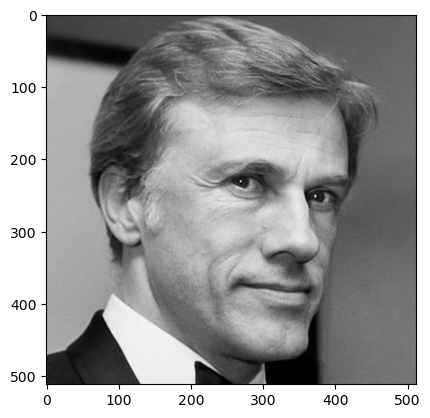

In [169]:
# importing image 
image = imread('christoph512.jpg')
plt.imshow(image, cmap='gray')

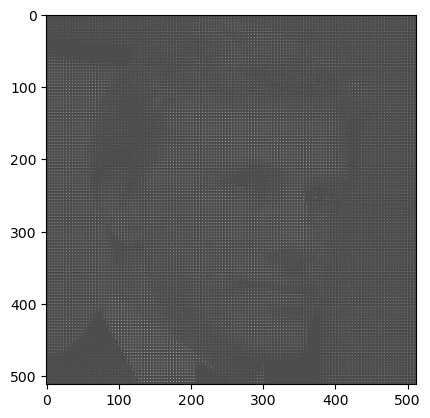

In [170]:
N = 4
result_image = block_dct2(image, N)
plt.imshow(result_image, cmap="gray")

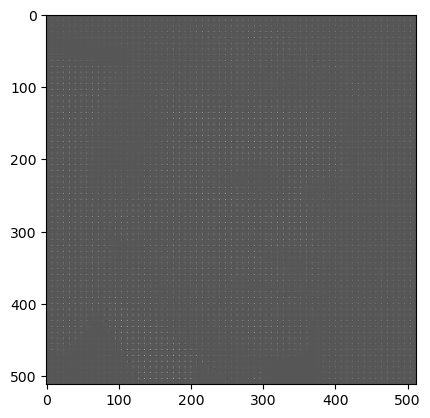

In [171]:
N = 8
result_image = block_dct2(image, N)
plt.imshow(result_image, cmap="gray")

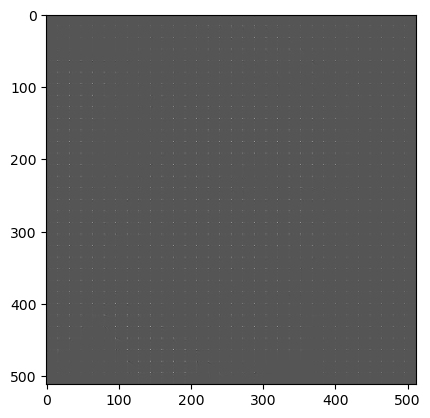

In [172]:
N = 16
result_image = block_dct2(image, N)
plt.imshow(result_image, cmap="gray")

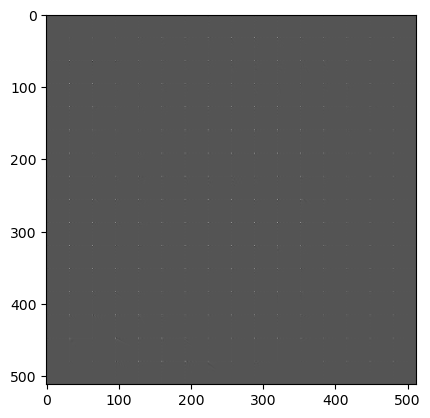

In [173]:
N = 32
result_image = block_dct2(image, N)
plt.imshow(result_image, cmap="gray")

# Task 1g)

It will give the same answer as  1f


# Task 1h)

In [174]:
def reorder(Y, N):
    chunks_of_same_basis_function = []

    for i in range(N):
        for j in range(N):
            chunks_of_same_basis_function.append([lane[i::N] for lane in Y[j::N]])

    # Call helper function to get an array with horizontal chunks
    horizontal_chunks = helper_same_chunks(chunks_of_same_basis_function, N)

    # Reorder the chunks vertically
    vertical_chunks = np.vstack(horizontal_chunks)

    return vertical_chunks

def helper_same_chunks(chunks_of_same_basis_function, N):
    result = []
    chunks_size = len(chunks_of_same_basis_function)

    # Iterate in N steps over the chunks and stack them column-wise
    for i in range(0, chunks_size, N):
        result.append(np.hstack(chunks_of_same_basis_function[i: i + N]))

    return result


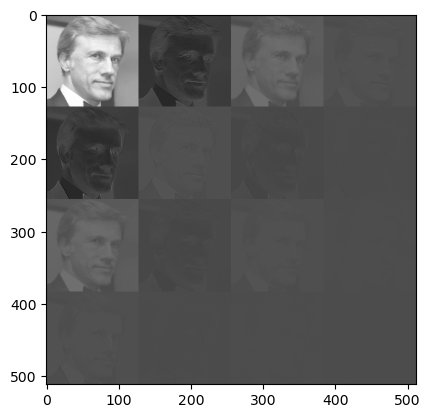

In [175]:
N = 4
dct_image = block_dct2(image, N)
Y_reorder = reorder(dct_image, N)
plt.imshow(Y_reorder, cmap="gray")

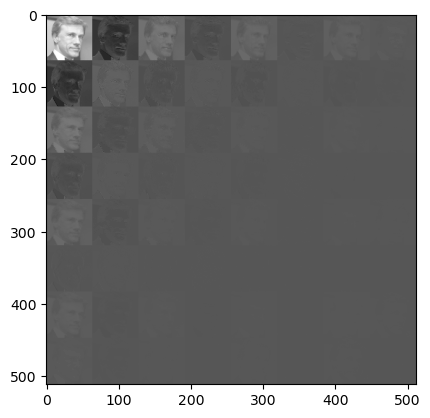

In [176]:
N = 8
dct_image = block_dct2(image, N)
Y_reorder = reorder(dct_image, N)
plt.imshow(Y_reorder, cmap="gray")

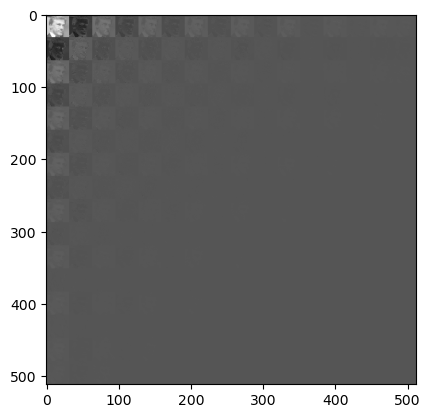

In [177]:
N = 16
dct_image = block_dct2(image, N)
Y_reorder = reorder(dct_image, N)
plt.imshow(Y_reorder, cmap="gray")

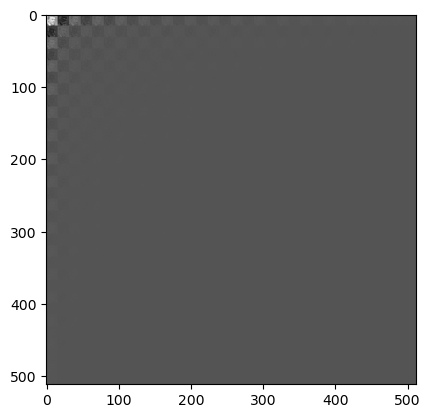

In [178]:
N = 32
dct_image = block_dct2(image, N)
Y_reorder = reorder(dct_image, N)
plt.imshow(Y_reorder, cmap="gray")

# Task 1i) Top Left Smaller Image

The fact that the top-left block of the reordered block DCT image contains the low-frequency components, which stand in for the global features and coarse details of the image, explains why the top-left sub-image appears to be a smaller version of the original image. The blocks in the reordered block DCT image represent higher-frequency components that capture finer details as we move towards the bottom-right corner of the image. As a result, the top-left sub-image appears to be a shrunk-down version of the original picture.

# Task 1j) Zig Zag

The JPEG zig-zag scheme rearranges the transformed DCT coefficients into a 1-dimensional vector to maximize compression efficiency. By clustering significant coefficients and enabling better utilization of available bit budgets, this pattern enables more effective compression techniques, such as run-length encoding. The zig-zag pattern also complements features of the human visual system, enhancing perception and maintaining image quality.

# Task 2a) Haar matrix

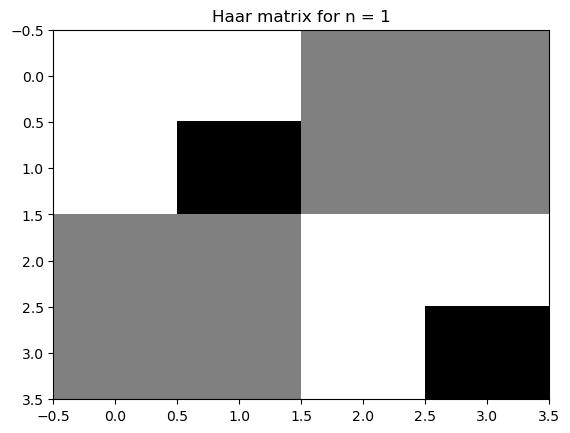

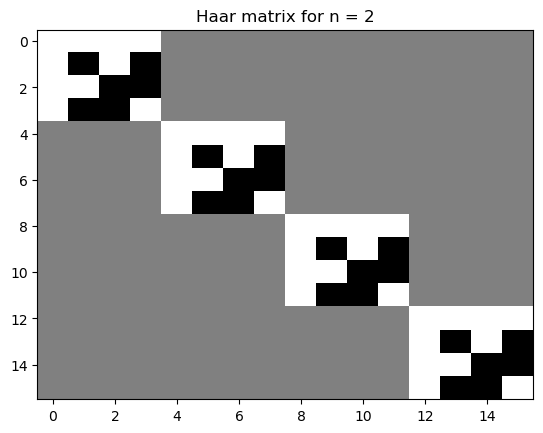

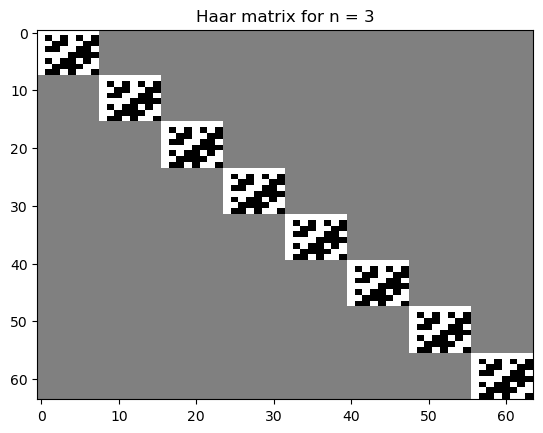

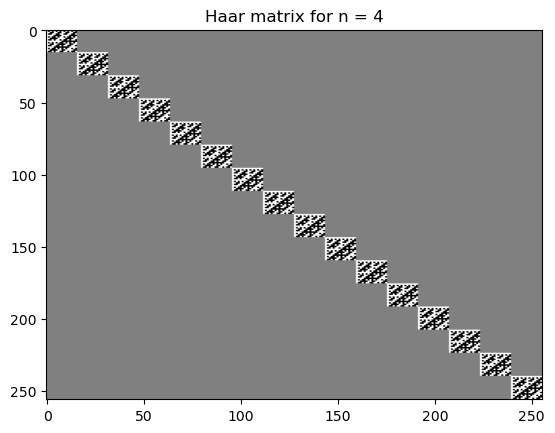

In [179]:
def haar_mat(n):
    size = 2**n
    H = np.array([[1, 1], [1, -1]])
    A = H
# Generate the Haar matrix iteratively using the Kronecker product
    for i in range(n-1):
        A = np.kron(A, H)

    I = np.eye(size)
    Haar = np.kron(I, A)
    return Haar

n_values = [1, 2, 3, 4]

for n in n_values:
    Haar_matrix = haar_mat(n)
    plt.imshow(Haar_matrix, cmap='gray', aspect='auto')
    plt.title("Haar matrix for n = {}".format(n))
    plt.show()


# Task 2b) Haar Transform(linear structure)

In [180]:
def haar_trans(X, N):
    M = X.shape[0]
    assert M % N == 0, "M must be divisible by N"
    assert np.log2(N).is_integer(), "N must be a power of 2"

    # Generate Haar matrix AHaar_N
    n = int(np.log2(N))
    AHaar_N = haar_mat(N)

    # Perform Haar transform
    Y = np.empty_like(X)

    for i in range(0, M, N):
        for j in range(0, M, N):
            block = X[i:i+N, j:j+N]
            transformed_block = np.matmul(np.matmul(AHaar_N, block), np.transpose(AHaar_N))
            Y[i:i+N, j:j+N] = transformed_block

    return Y


# Task 2c)

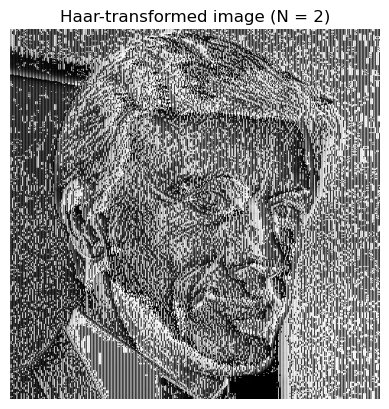

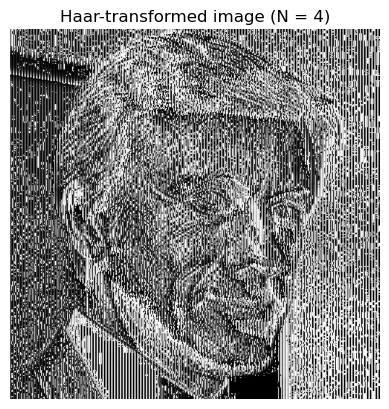

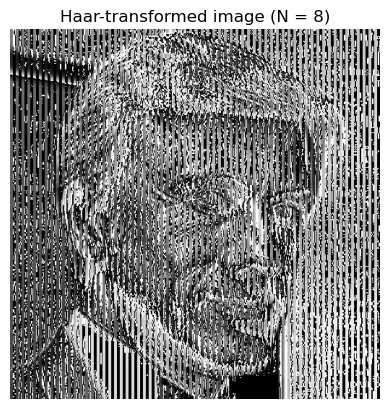

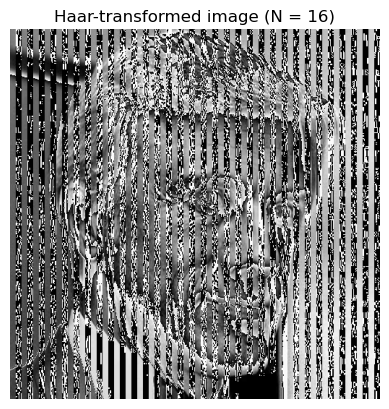

In [181]:
from PIL import Image

def plot_haar_transformed_image(image, block_size):
    # Convert the image to grayscale
    image_gray = image.convert('L')
    # Convert the grayscale image to a NumPy array
    image_array = np.array(image_gray)

    # Perform Haar transformation
    transformed_image = np.zeros_like(image_array, dtype=np.float32)
    for i in range(0, image_array.shape[0], block_size):
        for j in range(0, image_array.shape[1], block_size):
            block = image_array[i:i+block_size, j:j+block_size]
            transformed_block = np.zeros_like(block, dtype=np.float32)
            for k in range(block_size):
                even = (block[k, ::2] + block[k, 1::2]) / 2
                odd = (block[k, ::2] - block[k, 1::2]) / 2
                transformed_block[k] = np.concatenate((even, odd))
            transformed_image[i:i+block_size, j:j+block_size] = transformed_block

    # Plot the Haar-transformed image
    plt.imshow(transformed_image, cmap='gray')
    plt.title(f'Haar-transformed image (N = {block_size})')
    plt.axis('off')
    plt.show()

# Load the input image
image_path = 'christoph512.jpg'
image = Image.open(image_path)

# Set the block sizes
block_sizes = [2, 4, 8, 16]

# Plot the Haar-transformed images for different block sizes
for block_size in block_sizes:
    plot_haar_transformed_image(image, block_size)


# Task 2d) Haar Transforms(pyramid structure)

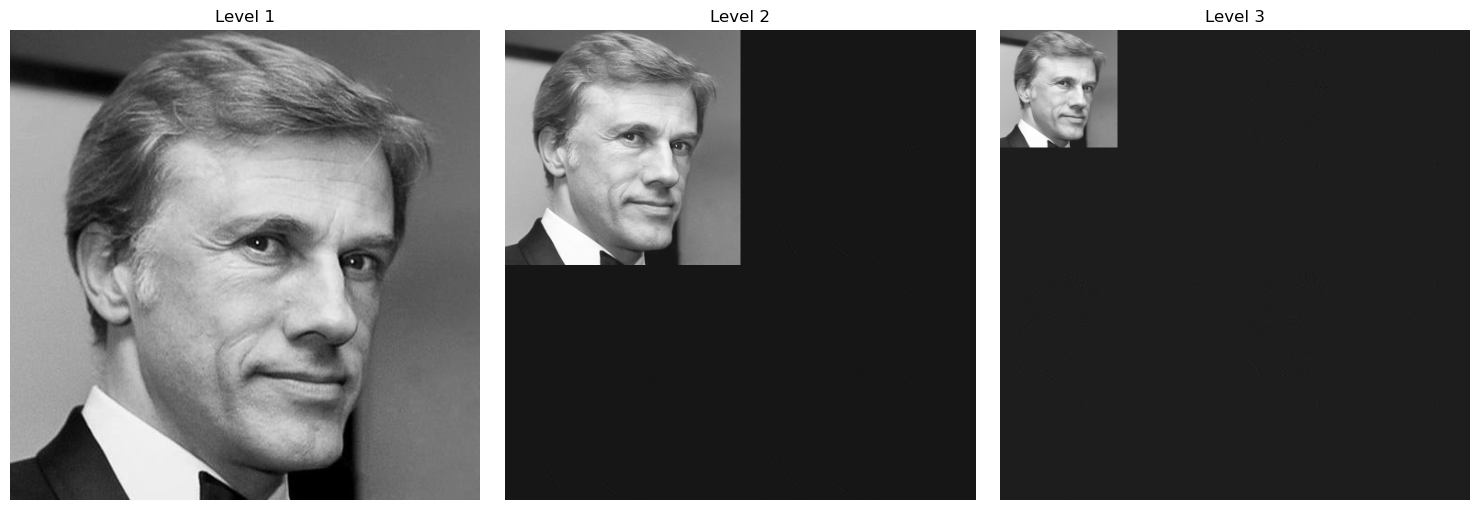

In [184]:
from PIL import Image

def linear_haar_transform(image_array):
    transformed_image = np.zeros_like(image_array, dtype=np.float32)

    for i in range(0, image_array.shape[0], 2):
        for j in range(0, image_array.shape[1], 2):
            block = image_array[i:i+2, j:j+2]
            average = (block[0, 0] + block[0, 1] + block[1, 0] + block[1, 1]) / 4
            difference = (block[0, 0] - block[0, 1] - block[1, 0] + block[1, 1]) / 4
            transformed_image[i//2, j//2] = average
            transformed_image[i//2 + image_array.shape[0]//2, j//2] = difference
            transformed_image[i//2, j//2 + image_array.shape[1]//2] = difference
            transformed_image[i//2 + image_array.shape[0]//2, j//2 + image_array.shape[1]//2] = -difference

    return transformed_image

def pyramid_haar_transform(image, level):
    # Convert the image to grayscale
    image_gray = image.convert('L')
    # Convert the grayscale image to a NumPy array
    image_array = np.array(image_gray, dtype=np.float32)

    pyramid_image = [image_array]

    for _ in range(level - 1):
        transformed_image = linear_haar_transform(pyramid_image[-1])
        pyramid_image.append(transformed_image)

    return pyramid_image

# Load the input image
image_path = 'christoph512.jpg'
image = Image.open(image_path)

# Set the decomposition level
level = 3

# Perform the pyramid Haar transformation
pyramid_image = pyramid_haar_transform(image, level)

# Plot the pyramid Haar-transformed images
fig, axes = plt.subplots(1, level, figsize=(15, 5))

for i in range(level):
    axes[i].imshow(pyramid_image[i], cmap='gray')
    axes[i].set_title(f'Level {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# Task 2e)

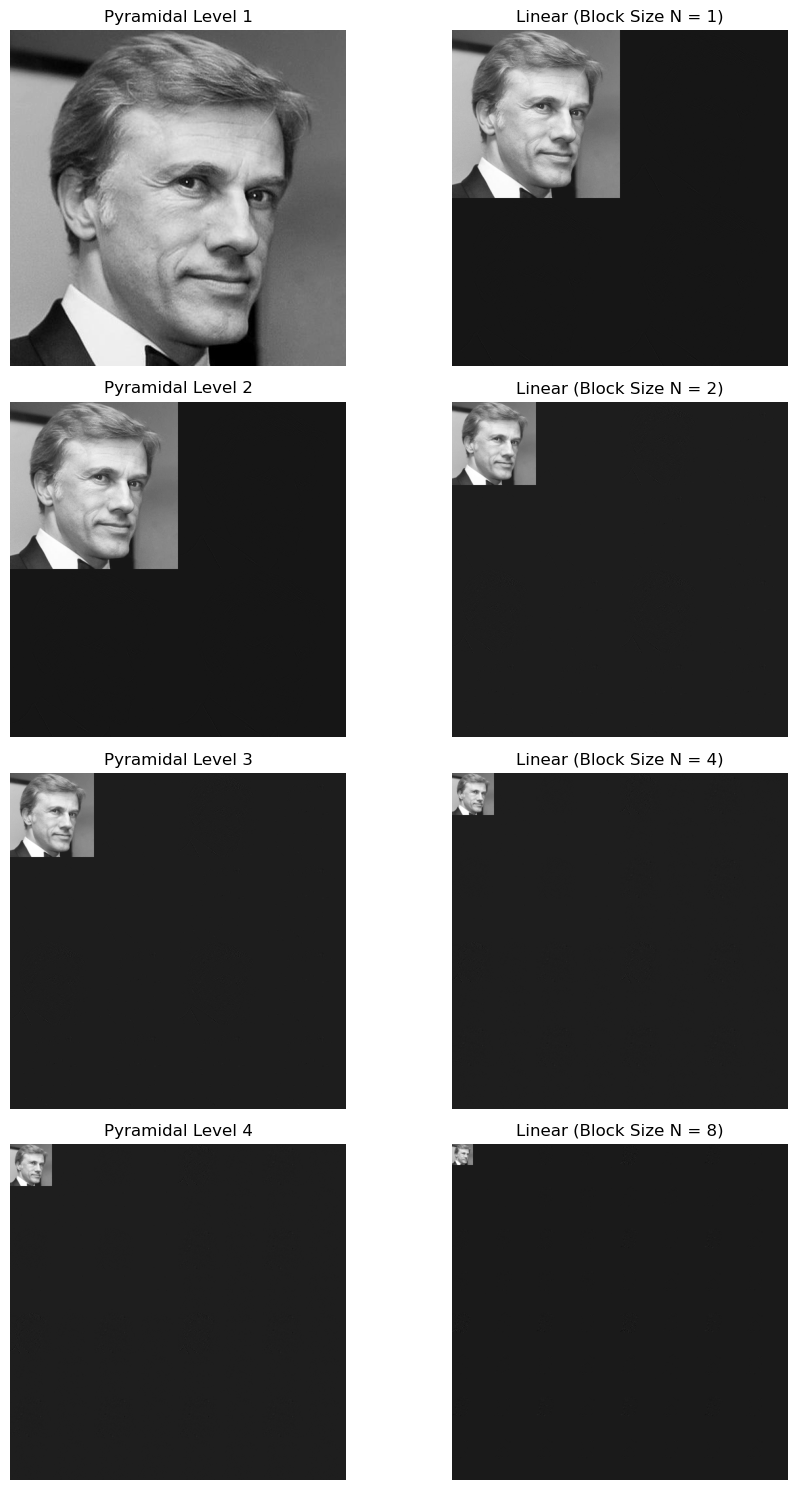

In [183]:
from PIL import Image

def linear_haar_transform(image_array):
    transformed_image = np.zeros_like(image_array, dtype=np.float32)

    for i in range(0, image_array.shape[0], 2):
        for j in range(0, image_array.shape[1], 2):
            block = image_array[i:i+2, j:j+2]
            average = (block[0, 0] + block[0, 1] + block[1, 0] + block[1, 1]) / 4
            difference = (block[0, 0] - block[0, 1] - block[1, 0] + block[1, 1]) / 4
            transformed_image[i//2, j//2] = average
            transformed_image[i//2 + image_array.shape[0]//2, j//2] = difference
            transformed_image[i//2, j//2 + image_array.shape[1]//2] = difference
            transformed_image[i//2 + image_array.shape[0]//2, j//2 + image_array.shape[1]//2] = -difference

    return transformed_image

def pyramid_haar_transform(image, level):
    # Convert the image to grayscale
    image_gray = image.convert('L')
    # Convert the grayscale image to a NumPy array
    image_array = np.array(image_gray, dtype=np.float32)

    pyramid_image = [image_array]

    for _ in range(level - 1):
        transformed_image = linear_haar_transform(pyramid_image[-1])
        pyramid_image.append(transformed_image)

    return pyramid_image

# Load the input image
image_path = 'christoph512.jpg'
image = Image.open(image_path)

# Set the maximum decomposition level
max_level = 4

# Plot the pyramidal and linear Haar-transformed images at each level
fig, axes = plt.subplots(max_level, 2, figsize=(10, 15))

for level in range(1, max_level + 1):
    # Perform the pyramidal Haar transformation
    pyramid_image = pyramid_haar_transform(image, level)

    # Plot the pyramidal Haar-transformed image
    axes[level - 1, 0].imshow(pyramid_image[level - 1], cmap='gray')
    axes[level - 1, 0].set_title(f'Pyramidal Level {level}')
    axes[level - 1, 0].axis('off')

    # Perform the linear Haar transformation
    linear_image = linear_haar_transform(pyramid_image[level - 1])

    # Plot the linear Haar-transformed image
    axes[level - 1, 1].imshow(linear_image, cmap='gray')
    axes[level - 1, 1].set_title(f'Linear (Block Size N = {2 ** (level - 1)})')
    axes[level - 1, 1].axis('off')

plt.tight_layout()
plt.show()


# Task 3a) Inspection of noisy audio signal

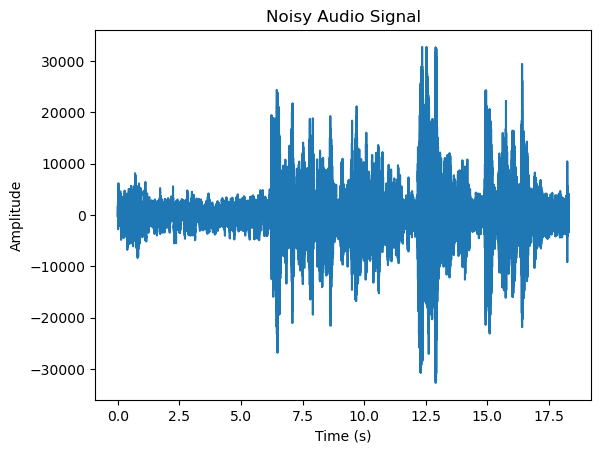

In [155]:
#Load the audio file
sampling_freq, audio_data = wavfile.read("audio.wav")

# Plot the audio signal in the time domain
time = np.arange(0, len(audio_data)) / sampling_freq
plt.plot(time, audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Noisy Audio Signal')
plt.show()


# Task 3b) STFT of the audio signal

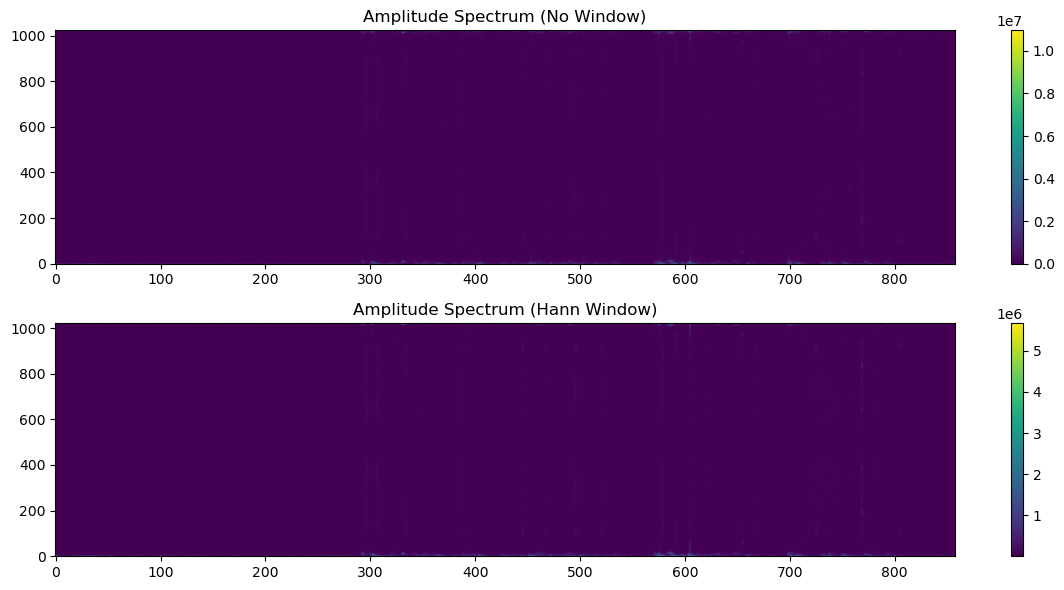

In [185]:
def stft(z, seg_len, win_func=False):
    # Calculate the number of segments
    num_segments = len(z) // seg_len

    # Initialize the output matrix
    W = np.zeros((seg_len, num_segments), dtype=np.complex128)

    # Apply STFT on each segment
    for m in range(num_segments):
        segment = z[m * seg_len: (m + 1) * seg_len].astype(float)
        if win_func:
            segment *= windows.hann(seg_len)  # Apply Hann window function to the segment
        W[:, m] = np.fft.fft(segment)

    return W


#  Load the audio file
sampling_freq, audio_data = wavfile.read("audio.wav")

#  Define segment length and cut the audio signal to a multiple of the segment length
seg_len = 1024
cut_length = len(audio_data) // seg_len * seg_len
z = audio_data[:cut_length]

# Apply the STFT with and without the Hann window
W_no_window = stft(z, seg_len, win_func=False)
W_hann_window = stft(z, seg_len, win_func=True)

# Plot the amplitude spectra on a logarithmic scale
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.imshow(np.abs(W_no_window), aspect='auto', origin='lower')
plt.title('Amplitude Spectrum (No Window)')
plt.colorbar()

plt.subplot(2, 1, 2)
plt.imshow(np.abs(W_hann_window), aspect='auto', origin='lower')
plt.title('Amplitude Spectrum (Hann Window)')
plt.colorbar()

plt.tight_layout()
plt.show()


# Task 3c) clean your audio spectrum with noise gaiting

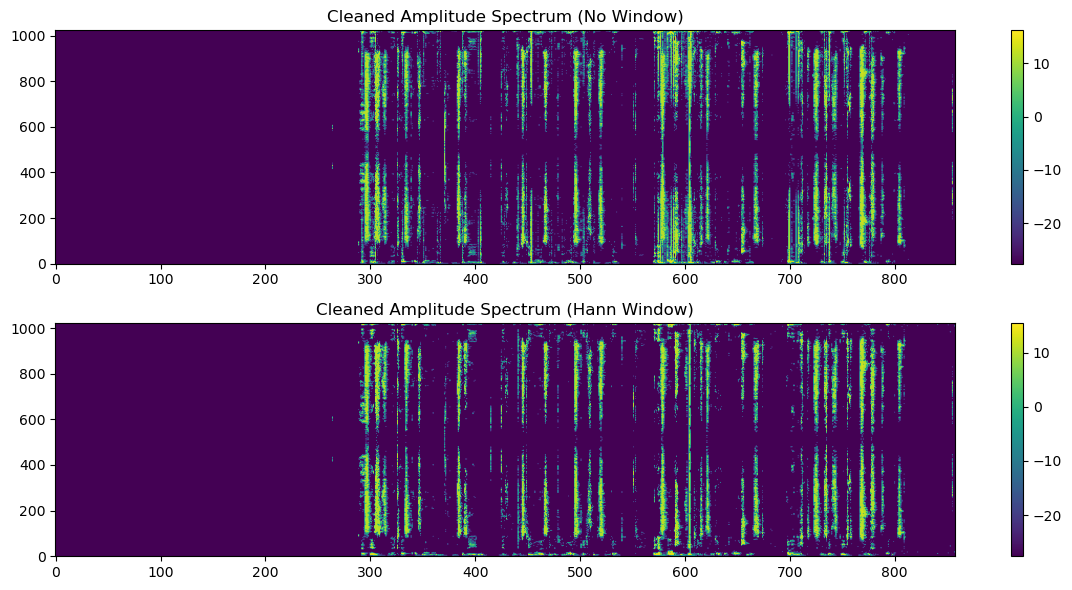

In [157]:
def stft(z, seg_len, win_func=False):
    # Calculate the number of segments
    num_segments = len(z) // seg_len

    # Initialize the output matrix
    W = np.zeros((seg_len, num_segments), dtype=np.complex128)

    # Apply STFT on each segment
    for m in range(num_segments):
        segment = z[m * seg_len: (m + 1) * seg_len].astype(float)
        if win_func:
            segment *= windows.hann(seg_len)  # Apply Hann window function to the segment
        W[:, m] = np.fft.fft(segment)

    return W

def noisegate(W, t_noise, thres_fac):
    # Calculate the number of segments in the noise epoch
    num_noise_segments = int(t_noise * sampling_freq / seg_len)

    # Extract the noise epoch from the noisy matrix W
    noise_epoch = W[:, :num_noise_segments]

    # Calculate the threshold of the noise gate
    noise_means = np.mean(np.log(np.abs(noise_epoch) + 1e-12), axis=1)
    noise_stds = np.std(np.log(np.abs(noise_epoch) + 1e-12), axis=1)
    threshold = noise_means + (thres_fac * noise_stds)

    # Clean the noisy matrix by applying the noise gate
    W_clean = np.copy(W)
    below_threshold_indices = np.log(np.abs(W_clean) + 1e-12) < threshold[:, np.newaxis]
    W_clean[below_threshold_indices] = 0

    return W_clean

#  Load the audio file
sampling_freq, audio_data = wavfile.read("audio.wav")

#  Define segment length and cut the audio signal to a multiple of the segment length
seg_len = 1024
cut_length = len(audio_data) // seg_len * seg_len
z = audio_data[:cut_length]

#  Apply the STFT with and without the Hann window
W_no_window = stft(z, seg_len, win_func=False)
W_hann_window = stft(z, seg_len, win_func=True)

#  Define noise gate parameters
t_noise = 5  # Length of the noise epoch in seconds
thres_fac = 3  # Threshold factor for the noise gate

# Extract the noise epoch from the input matrix W_no_window
num_noise_segments = int(t_noise * sampling_freq / seg_len)
noise_epoch = W_no_window[:, :num_noise_segments]

# Calculate the threshold of the noise gate
noise_means = np.mean(np.log(np.abs(noise_epoch) + 1e-12), axis=1)
noise_stds = np.std(np.log(np.abs(noise_epoch) + 1e-12), axis=1)
threshold = noise_means + (thres_fac * noise_stds)

# Apply noise gating to the output matrix W_no_window
W_no_window_clean = noisegate(W_no_window, t_noise, thres_fac)

# Extract the noise epoch from the input matrix W_hann_window
noise_epoch = W_hann_window[:, :num_noise_segments]

# Calculate the threshold of the noise gate
noise_means = np.mean(np.log(np.abs(noise_epoch) + 1e-12), axis=1)
noise_stds = np.std(np.log(np.abs(noise_epoch) + 1e-12), axis=1)
threshold = noise_means + (thres_fac * noise_stds)

# Apply noise gating to the output matrix W_hann_window
W_hann_window_clean = noisegate(W_hann_window, t_noise, thres_fac)

#  Plot the log-scaled amplitude spectra of the cleaned output matrices
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.imshow(np.log(np.abs(W_no_window_clean) + 1e-12), aspect='auto', origin='lower')
plt.title('Cleaned Amplitude Spectrum (No Window)')
plt.colorbar()

plt.subplot(2, 1, 2)
plt.imshow(np.log(np.abs(W_hann_window_clean) + 1e-12), aspect='auto', origin='lower')
plt.title('Cleaned Amplitude Spectrum (Hann Window)')
plt.colorbar()

plt.tight_layout()
plt.show()
